In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [5]:
data = pd.read_excel('Online Retail.xlsx')

In [6]:
df = data.copy()
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

### There are 541909 rows and 8 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Splitting numerical, categorical and datetime features

In [9]:
num_features=df._get_numeric_data().columns
cat_features=df.select_dtypes(include='object').columns
date_feature=df.select_dtypes(include='datetime').columns

print("The Numerical Features are:\n")
for i in num_features:
    print(i)
print("\n")
print("The Categorical Features are:")
for i in cat_features:
    print(i)
print("\n")
print("The Datetime Features are:")
for i in date_feature:
    print(i)    

The Numerical Features are:

Quantity
UnitPrice
CustomerID


The Categorical Features are:
InvoiceNo
StockCode
Description
Country


The Datetime Features are:
InvoiceDate


### Checking NULL values

In [10]:
null=df.isnull().sum()/len(df)

null[null>0]*100

Description     0.268311
CustomerID     24.926694
dtype: float64

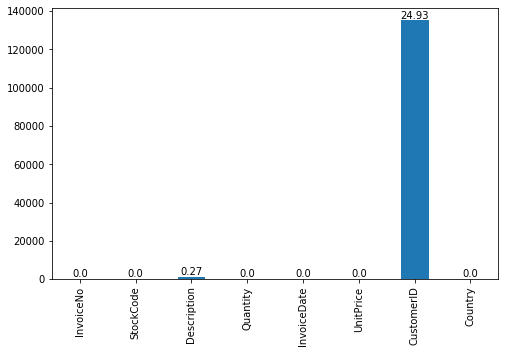

In [11]:
plt.figure(figsize=(8,5))
ax=df.isnull().sum().plot(kind='bar')
labels = round(df.isnull().sum()/len(df)*100,2)
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

#### Nearly 24.9% of CustomerID is missing
#### And 0.268% of Description is missing
- Since, we are only interested in Customer-centric behaviour, we can drop the missing values 

### Dropping the NULL values

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.shape

(406829, 8)

### Checking for Duplicate Entries

In [15]:
duplicates = df[df.duplicated(keep=False)]
duplicates.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom


In [16]:
duplicates.shape

(10062, 8)

- **In total there are 10062 duplicate entries, which can be removed from the dataset**

### Dropping the Duplicate Entries

In [17]:
df.drop_duplicates(inplace=True) 

In [18]:
df.shape

(401604, 8)

### Convert CustomerID column to Integer datatype from float

In [19]:
df['CustomerID']=df['CustomerID'].astype('int')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [21]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Descritpive Statistics

In [22]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


### Identifying Total Customers 

In [23]:
df['CustomerID'].nunique()

4372

- **There are 4372 existing customers**

### Total Number of Unique Orders made

In [24]:
print("Total number of transactions: ", df['InvoiceNo'].nunique())

Total number of transactions:  22190


- **Total number of transactions:  22190**

### Analysing the Product Descritpions

- We identifed few Non-Product entries in description

In [25]:
non_prod_desc= ['Bank Charges','CARRIAGE',"Discount","DOTCOM POSTAGE","Manual","Next Day Carriage","PACKING CHARGE","POSTAGE"]
non_prod_desc

['Bank Charges',
 'CARRIAGE',
 'Discount',
 'DOTCOM POSTAGE',
 'Manual',
 'Next Day Carriage',
 'PACKING CHARGE',
 'POSTAGE']

In [26]:
rows=[]
for i in non_prod_desc:
    df[df.Description==i]
    rows.append(df[df.Description==i].shape[0])
sum(rows)

1991

- **There 1991 entries with non-product items**

### Create a new column 'Total Sales Amount'

In [27]:
df['Total_Sales_Amount'] = df['Quantity']*df['UnitPrice']

In [28]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### Create new columns 'Date' , 'Month','Year_Month','Day' and 'Hour'

In [29]:
df.insert(loc=5, column='Date', value=df['InvoiceDate'].dt.date)
df.insert(loc=6, column='Year_Month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df.insert(loc=7, column='Month', value=df['InvoiceDate'].dt.month)
df.insert(loc=8, column='Day', value=(df['InvoiceDate'].dt.dayofweek)+1) # mon=0, tue=1, ... sun=6 
df.insert(loc=9, column='Hour', value=df['InvoiceDate'].dt.hour)

In [30]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,201012,12,3,8,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,201012,12,3,8,3.39,17850,United Kingdom,20.34


### Identifying the countries of operation

In [31]:
df.Country.value_counts(normalize=True)*100

United Kingdom          88.825809
Germany                  2.360534
France                   2.110288
EIRE                     1.861286
Spain                    0.629476
Netherlands              0.590383
Belgium                  0.515184
Switzerland              0.467376
Portugal                 0.366281
Australia                0.313244
Norway                   0.270416
Italy                    0.199948
Channel Islands          0.188494
Finland                  0.173056
Cyprus                   0.152140
Sweden                   0.114790
Austria                  0.099850
Denmark                  0.096862
Japan                    0.089143
Poland                   0.084910
USA                      0.072459
Israel                   0.061503
Unspecified              0.060009
Singapore                0.057021
Iceland                  0.045318
Canada                   0.037599
Greece                   0.036354
Malta                    0.031623
United Arab Emirates     0.016932
European Commu

#### Nearly 88.95% of sales are based out of the UK. 
#### Not even 0.1% of sales are from Denmark ,Japan ,Poland ,USA, Israel,  Singapore, Iceland,  Canada ,   Greece , Malta,   United Arab Emirates, European Community,RSA,Lebanon ,Lithuania ,Brazil  ,Czech Republic ,Bahrain  ,Saudi Arabia 

#### And few conutries are 'Unspecified' which can be dropped (only 0.059% sales)

In [32]:
df.shape

(401604, 14)

#### Since there are few countries with very less sales, we are categorizing them into "Others"

In [33]:
others = "Denmark ,Japan ,Poland ,USA ,Israel ,Singapore ,Iceland ,Canada ,Greece ,Malta ,United Arab Emirates ,European Community ,RSA ,Lebanon ,Lithuania ,Brazil ,Czech Republic ,Bahrain ,Saudi Arabia ,Unspecified"
others=others.split(" ,")
others

['Denmark',
 'Japan',
 'Poland',
 'USA',
 'Israel',
 'Singapore',
 'Iceland',
 'Canada',
 'Greece',
 'Malta',
 'United Arab Emirates',
 'European Community',
 'RSA',
 'Lebanon',
 'Lithuania',
 'Brazil',
 'Czech Republic',
 'Bahrain',
 'Saudi Arabia',
 'Unspecified']

In [34]:
len(others)

20

In [35]:
for i in others:
    df['Country'][df.Country == i] = 'Others'
df.Country.unique()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Others', 'Portugal',
       'Italy', 'Belgium', 'Channel Islands', 'Cyprus', 'Sweden',
       'Austria', 'Finland'], dtype=object)

In [36]:
df.shape

(401604, 14)

### Analysing Cancellations

In [37]:
cancellations = df[df['InvoiceNo'].str[0]=='C']
cancellations.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,2010-12-01,201012,12,3,9,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,2010-12-01,201012,12,3,9,4.65,15311,United Kingdom,-4.65


In [38]:
cancellations.shape

(8872, 14)

- **There are 8872 cancelled orders**

### Dropping Cancelled Orders from the dataset

In [39]:
df = df[df['InvoiceNo'].str[0]!='C']
df.shape

(392732, 14)

### Checking for Anomalies in Quantity and UnitPrice 

In [40]:
df1 = df[df.Quantity < 0]

In [41]:
df1.shape

(0, 14)

In [42]:
df2 = df[df.UnitPrice < 0]

In [43]:
df2.shape

(0, 14)

#### Descriptive Statistics

In [44]:
df.describe()[['Quantity','UnitPrice','Total_Sales_Amount']]

,Quantity,UnitPrice,Total_Sales_Amount
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,22.629195
std,181.588420,22.240725,311.083465
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.390000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


In [45]:
df['StockCode'].nunique()

3665

- **There are 3665 unique StockCode entries.**

In [46]:
df['Description'].nunique()

3877

- **There are 3877 unique Description entries.**

#### As we can see here there are 3665 unique StockCode entries but 3877 unique Description values. Therefore, further analysis has to be done to identify duplicate entries for Description.

### Exploratory Data Analysis of Cleaned Data

In [47]:
cleaned_data = df.copy()
cleaned_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,201012,12,3,8,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,201012,12,3,8,3.39,17850,United Kingdom,20.34


### Univariate Analysis

**Feature-1: InvoiceNo**

- The Invoice no is a 6 digit number numerical number which was generated at the time of the transaction. 
- The Invoice number could precede with a character ‘C’ which denotes that the order was cancelled which is beyond the scope of our analysis. So, we have dropped those records already.

In [48]:
cleaned_data['InvoiceNo'].nunique()

18536

- There are 18536 unique InvoiceNo

In [49]:
cleaned_data['InvoiceNo'].value_counts().nlargest()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

- These are the Top-5 InvoiceNo with maxmium orders

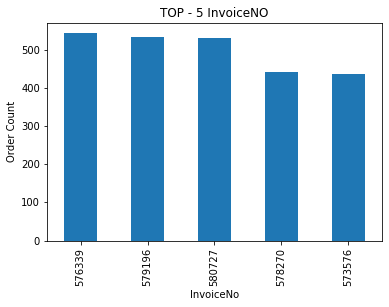

In [50]:
cleaned_data['InvoiceNo'].value_counts().nlargest().plot(kind='bar')
plt.title('TOP - 5 InvoiceNO')
plt.xlabel("InvoiceNo")
plt.ylabel("Order Count")
plt.show()

In [51]:
cleaned_data[cleaned_data['InvoiceNo']==576339].head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount
466895,576339,10135,COLOURING PENCILS BROWN TUBE,14,2011-11-14 15:27:00,2011-11-14,201111,11,1,15,2.46,14096,United Kingdom,34.44


**The CustomerID 14096 has the most number of orders.**

**Feature 2: StockCode**

- Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

In [52]:
cleaned_data['StockCode'].nunique()

3665

In [53]:
cleaned_data['StockCode'].value_counts().nlargest()

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
Name: StockCode, dtype: int64

- **These are the Top-5 StockCode with maxmium orders**

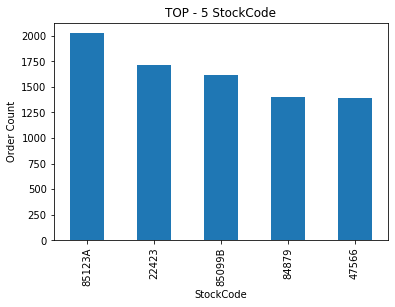

In [54]:
cleaned_data['StockCode'].value_counts().nlargest().plot(kind='bar')
plt.title('TOP - 5 StockCode')
plt.xlabel("StockCode")
plt.ylabel("Order Count")
plt.show()

In [55]:
cleaned_data[cleaned_data['StockCode'] == '85123A'].head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,201012,12,3,8,2.55,17850,United Kingdom,15.3
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2010-12-01,201012,12,3,9,2.55,17850,United Kingdom,15.3


**From the above plot, we can infer that StockCode 85123A holds the highest order count and the product is WHITE HANGING HEART T-LIGHT HOLDER is frequently bought.**

**Feature 3: Description**

- Description consists of the Name of the product which is actually Nominal in nature .

In [56]:
cleaned_data['Description'].nunique()

3877

*   There are 3877 unique Description values.




In [57]:
cleaned_data['Description'].value_counts().nlargest()

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
Name: Description, dtype: int64

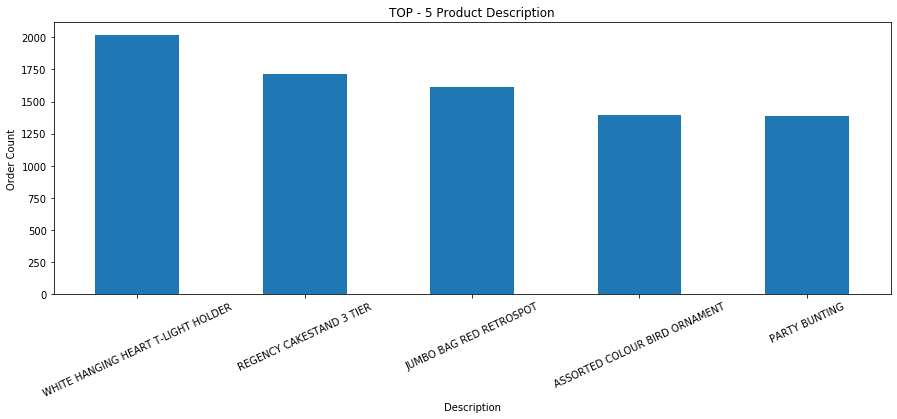

In [58]:
plt.figure(figsize=(15,5))
cleaned_data['Description'].value_counts().nlargest().plot(kind='bar')
plt.title('TOP - 5 Product Description')
plt.xlabel("Description")
plt.ylabel("Order Count")
plt.xticks(rotation=25)
plt.show()

**Feature 4: Quantity**

- Quantity describes the number of quantities the product was purchased in a single transaction.

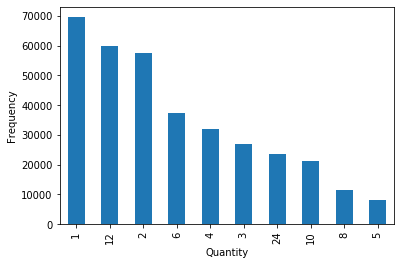

In [59]:
cleaned_data['Quantity'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

- Most customers have made only single quantity purchase

**Feature 5: CustomerID**
- CustomerID is a unique 5 digit numeric and nominal entry that is assigned to a customer

In [60]:
cleaned_data['CustomerID'].nunique()

4339

In [61]:
cleaned_data['CustomerID'].value_counts()[cleaned_data['CustomerID'].value_counts() == 1].value_counts()

1    72
Name: CustomerID, dtype: int64

In [62]:
cleaned_data['CustomerID'].nunique() - 72

4267

In [63]:
cleaned_data['CustomerID'].value_counts()[cleaned_data['CustomerID'].value_counts() > 5].value_counts().sum()

4039

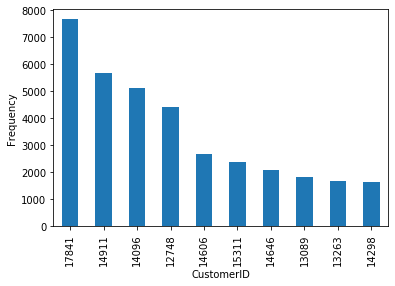

In [64]:
cleaned_data['CustomerID'].value_counts().head(10).plot(kind='bar')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

- The purchase frequency of top 10 customers in the year 2010 to 2011 ranges from 7847 to 1637.
- There are 4267 customers who shopped more than once.
- There are only 72 one time shoppers.
- There are 4039 customers who purchased more than 5 times.

**Feature 6: Country**
- Country shows which country/region the customer belongs.

In [65]:
cleaned_data['Country'].nunique()

18

In [66]:
cleaned_data['Country'].value_counts()[cleaned_data['Country'].value_counts() == 1].count()

0

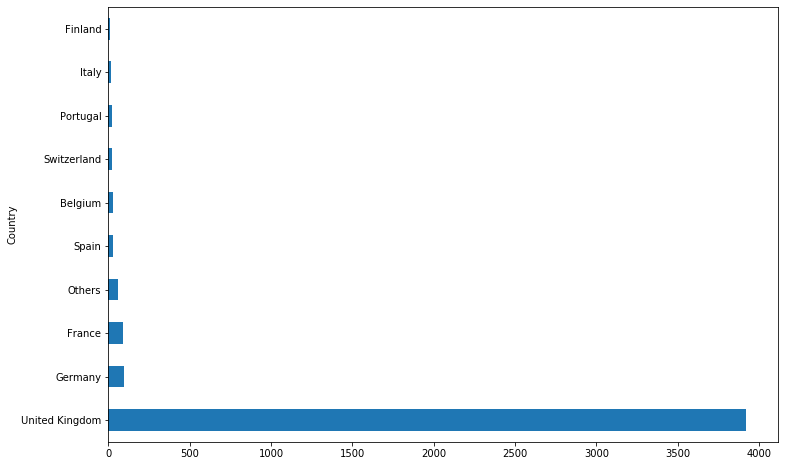

In [67]:
c = cleaned_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
c1 = c.head(10)
plt.figure(figsize=(12,8))
c1.plot(kind='barh',rot=0)
plt.show()

In [68]:
## Total customers from the top 10 cities
c1.sum()

4280

**Out of total 4339, 4280 customers are from Top 10 selling Cities which is around 98.64%**

- United Kingdom ,Germany and France are the top 3 countries which has more customers.
- There are zero countries where shopping is done only once,which is a good sign for business because customers are shopping more than once from all the countries.

### Year-Wise Sales

In [69]:
cleaned_data.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,201012,12,3,8,2.55,17850,United Kingdom,15.3


In [70]:
cleaned_data.insert(loc=7,column='Year',value=cleaned_data.InvoiceDate.dt.year)

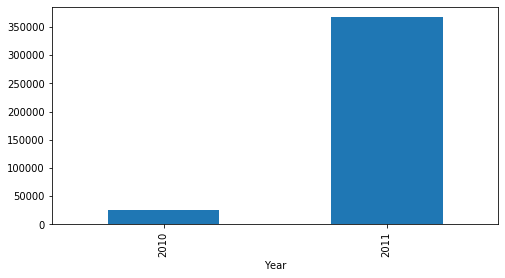

In [71]:
plt.figure(figsize=(8,4))
year = cleaned_data['Year'].value_counts().sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Year')
plt.show()

In [72]:
### Percentage of sales
year_1 = cleaned_data['Year'].value_counts().sort_values(ascending=True)
year_1/year_1.sum() * 100

2010     6.537028
2011    93.462972
Name: Year, dtype: float64

- In 2010, the number of orders is very less compared to the year 2011 and it is only 6.537 %
- In 2011, the number of orders increased dramatically and 93.46 % of orders came in this year,which shows that the online retail store is growing year by year.

### Bivariate Analysis

### Quarterly Analysis

In [73]:
cleaned_data['Quarter'] = pd.PeriodIndex(pd.to_datetime(cleaned_data.InvoiceDate), freq='Q')

In [74]:
cleaned_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,201012,2010,12,3,8,2.55,17850,United Kingdom,15.30,2010Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,201012,2010,12,3,8,3.39,17850,United Kingdom,20.34,2010Q4


In [75]:
cleaned_data['Months_by_Name']=pd.cut(cleaned_data['Month'],bins=[0,1,2,3,4,5,6,7,8,9,10,11,12],
       labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [76]:
quarter_df = cleaned_data.groupby(cleaned_data['Quarter'])[['Quantity','Total_Sales_Amount']].sum()
quarter_df

,Quantity,Total_Sales_Amount
Quarter,,
2010Q4,311063,570422.730
2011Q1,961188,1608267.990
2011Q2,1027331,1805775.531
2011Q3,1309216,2193704.143
2011Q4,1557088,2709038.500


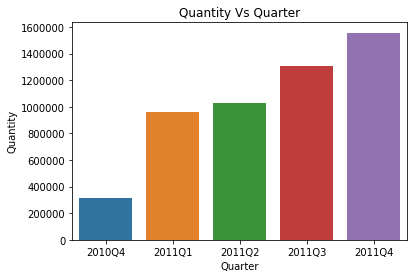

In [77]:
sns.barplot(x=quarter_df.index,
            y=quarter_df['Quantity'].values)
plt.title("Quantity Vs Quarter")
plt.ylabel("Quantity")
plt.show()

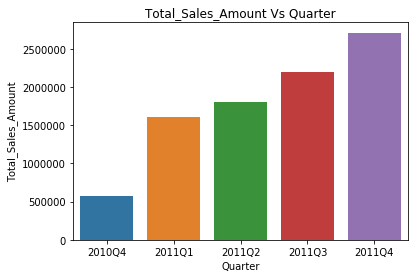

In [78]:
sns.barplot(x=quarter_df.index,
            y=quarter_df['Total_Sales_Amount'].values)
plt.title("Total_Sales_Amount Vs Quarter")
plt.ylabel("Total_Sales_Amount")
plt.show()

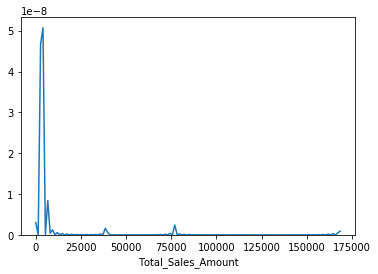

In [79]:
sns.distplot(cleaned_data['Total_Sales_Amount'],hist=False)
plt.show()

### Countries with high Sales

In [80]:
val = cleaned_data.Country.value_counts(normalize=True)*100
valued_countries = val[val>0.1]

In [81]:
val = pd.DataFrame(valued_countries).rename({'Country':'Percentage of Sales'},axis=1)
val=val.reset_index()
val=val.rename({'index':'Country'},axis=1)
val

,Country,Percentage of Sales
0,United Kingdom,88.922471
1,Germany,2.298514
2,France,2.120275
3,EIRE,1.840441
4,Others,0.727468
5,Spain,0.631474
6,Netherlands,0.601683
7,Belgium,0.517147
8,Switzerland,0.469022
9,Portugal,0.369972


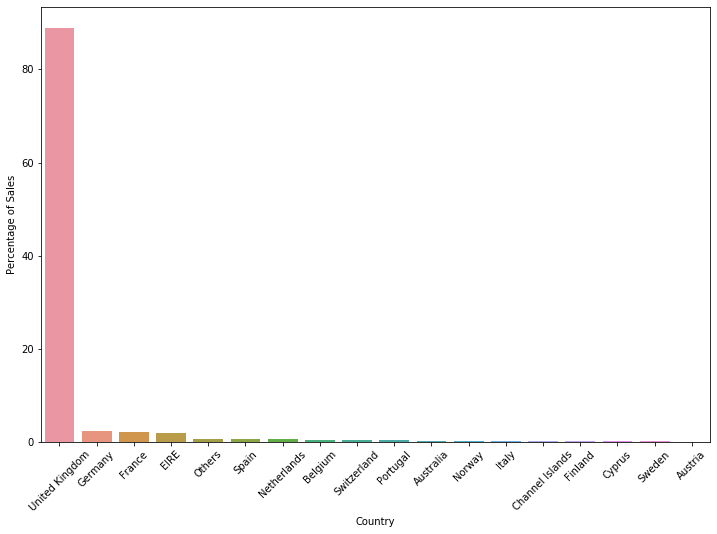

In [82]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(val['Country'],val['Percentage of Sales'])
plt.show()

### Groupby CustomerID

#### How many orders made by the customers in each country ?

In [83]:
cust_orders_by_country = cleaned_data.groupby(by=['CustomerID','Country'])['InvoiceNo'].count()
cust_orders_by_country = pd.DataFrame(cust_orders_by_country)
cust_orders_by_country = cust_orders_by_country.reset_index()
cust_orders_by_country = cust_orders_by_country.rename({'InvoiceNo':'Total Number of Orders Placed'},axis=1)
cust_orders_by_country

,CustomerID,Country,Total Number of Orders Placed
0,12346,United Kingdom,1
1,12347,Others,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,721


#### TOP 20 Customers

In [84]:
top_20_customers = cust_orders_by_country.sort_values(by='Total Number of Orders Placed',ascending=False).head(20)
top_20_customers

,CustomerID,Country,Total Number of Orders Placed
4019,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413
1670,14606,United Kingdom,2677
2185,15311,United Kingdom,2366
1698,14646,Netherlands,2080
570,13089,United Kingdom,1814
699,13263,United Kingdom,1667
1443,14298,United Kingdom,1637


#### Bottom 20 Customers

In [85]:
Bottom_20_customers = cust_orders_by_country.sort_values(by='Total Number of Orders Placed').head(20)
Bottom_20_customers

,CustomerID,Country,Total Number of Orders Placed
0,12346,United Kingdom,1
4197,18084,United Kingdom,1
705,13270,United Kingdom,1
3226,16738,United Kingdom,1
2442,15657,United Kingdom,1
3228,16742,United Kingdom,1
4218,18113,United Kingdom,1
3249,16765,United Kingdom,1
2451,15668,United Kingdom,1
522,13017,United Kingdom,1


#### Top 20 Spenders

In [86]:
cust_spending_by_country = cleaned_data.groupby(['CustomerID','Country'])['Total_Sales_Amount'].sum()
cust_spending_by_country = pd.DataFrame(cust_spending_by_country)
cust_spending_by_country = cust_spending_by_country.reset_index()
cust_spending_by_country = cust_spending_by_country.rename({'Total_Sales_Amount':'Total Money Spent'},axis=1)
cust_spending_by_country

,CustomerID,Country,Total Money Spent
0,12346,United Kingdom,77183.60
1,12347,Others,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2045.53


#### Top 20 Spenders

In [87]:
top_20_spenders = cust_spending_by_country.sort_values(by='Total Money Spent',ascending=False).head(20)
top_20_spenders

,CustomerID,Country,Total Money Spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194390.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143711.17
57,12415,Australia,124914.53
1342,14156,EIRE,117210.08
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,80850.84
0,12346,United Kingdom,77183.60


#### Bottom 20 Spenders

In [88]:
bottom_20_spenders = cust_spending_by_country.sort_values(by='Total Money Spent').head(20)
bottom_20_spenders

,CustomerID,Country,Total Money Spent
693,13256,United Kingdom,0.00
3226,16738,United Kingdom,3.75
1802,14792,United Kingdom,6.20
3023,16454,United Kingdom,6.90
4107,17956,United Kingdom,12.75
3332,16878,United Kingdom,13.30
3969,17763,United Kingdom,15.00
731,13307,United Kingdom,15.00
2567,15823,United Kingdom,15.00
2753,16093,United Kingdom,17.00


### Monthly Order Count

In [89]:
monthly_order_count = cleaned_data.groupby('Year_Month')['InvoiceNo'].nunique()
monthly_order_count = pd.DataFrame(monthly_order_count)
monthly_order_count=monthly_order_count.reset_index()
monthly_order_count = monthly_order_count.rename({'InvoiceNo':'Monthly Order Count'},axis=1)
monthly_order_count

,Year_Month,Monthly Order Count
0,201012,1400
1,201101,987
2,201102,998
3,201103,1321
4,201104,1149
5,201105,1555
6,201106,1393
7,201107,1331
8,201108,1281
9,201109,1756


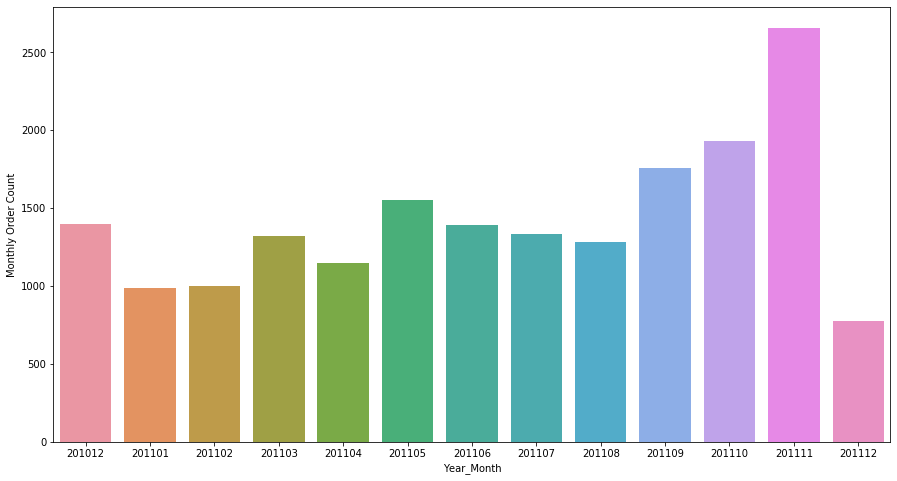

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(monthly_order_count['Year_Month'],monthly_order_count['Monthly Order Count'])
plt.show()

#### The number of orders made in Dec 2011 is unusually low

### Checking orders in Dec 2011

In [91]:
cleaned_data[cleaned_data['Year_Month']==201112]['InvoiceDate'].min()

Timestamp('2011-12-01 08:33:00')

In [92]:
cleaned_data[cleaned_data['Year_Month']==201112]['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

#### We can observe that the order details in december are incomplete. Therefore, we can drop this year_month

In [93]:
cleaned_data = cleaned_data[cleaned_data['Year_Month']!=201112]

In [94]:
df.shape

(392732, 14)

### High Sales is Observed for November month
- This could be due to Black Friday Sales (25th November 2011)

In [95]:
cleaned_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Months_by_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,201012,2010,12,3,8,2.55,17850,United Kingdom,15.30,2010Q4,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,201012,2010,12,3,8,3.39,17850,United Kingdom,20.34,2010Q4,Dec


In [96]:
data_nov=cleaned_data[cleaned_data['Month']==11]

In [97]:
data_nov.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Months_by_Name
431673,573744,21314,SMALL GLASS HEART TRINKET POT,8,2011-11-01 08:16:00,2011-11-01,201111,2011,11,2,8,2.10,17733,United Kingdom,16.8,2011Q4,Nov
431674,573744,21704,BAG 250g SWIRLY MARBLES,12,2011-11-01 08:16:00,2011-11-01,201111,2011,11,2,8,0.85,17733,United Kingdom,10.2,2011Q4,Nov


In [98]:
data_nov['Day'].value_counts()

3    11861
2    11500
7    11374
4    10356
1     9569
5     8522
Name: Day, dtype: int64

In [99]:
data_nov1=pd.DataFrame(data_nov.groupby('Day')['InvoiceNo'].nunique().sort_values(ascending=False))
data_nov1=data_nov1.reset_index()

In [100]:
data_nov1.head(7)

,Day,InvoiceNo
0,3,554
1,2,535
2,4,470
3,1,404
4,5,357
5,7,338


In [101]:
data_nov1.sort_values(by='Day')
data_nov1.rename(columns={'InvoiceNo':'Number of Orders'},inplace=True)

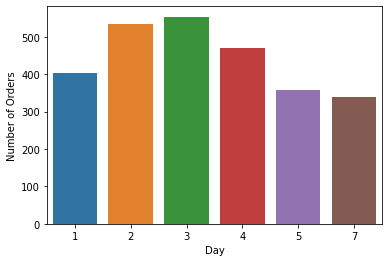

In [102]:
sns.barplot(data_nov1['Day'],data_nov1['Number of Orders'])
plt.show()

### Quarterly Order Count

In [103]:
Quarterly_order_count = cleaned_data.groupby('Quarter')['InvoiceNo'].nunique()
Quarterly_order_count = pd.DataFrame(Quarterly_order_count)
Quarterly_order_count = Quarterly_order_count.reset_index()
Quarterly_order_count = Quarterly_order_count.rename({'InvoiceNo':'Quarterly_Order_Count'},axis=1)
Quarterly_order_count

,Quarter,Quarterly_Order_Count
0,2010Q4,1400
1,2011Q1,3306
2,2011Q2,4097
3,2011Q3,4368
4,2011Q4,4587


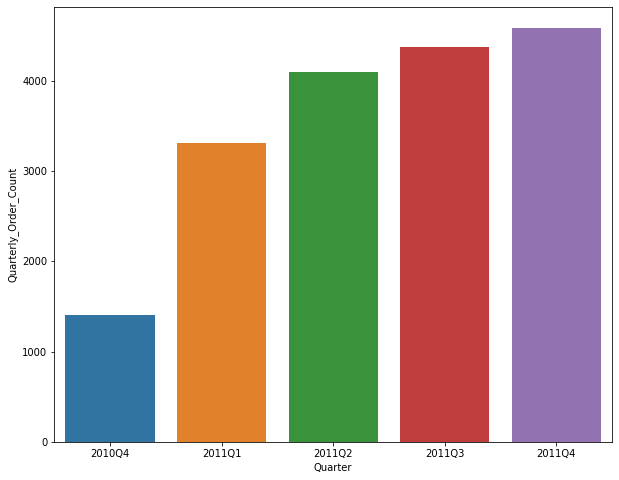

In [104]:
plt.figure(figsize=(10,8))
sns.barplot(Quarterly_order_count['Quarter'],Quarterly_order_count['Quarterly_Order_Count'])
plt.show()

- **We can observe that the orders are more in Q4 of year 2011**

### Quarterly Revenue 

In [105]:
Quarterly_revenue = cleaned_data.groupby('Quarter')['Total_Sales_Amount'].sum()
Quarterly_revenue = pd.DataFrame(Quarterly_revenue)
Quarterly_revenue = Quarterly_revenue.reset_index()
Quarterly_revenue = Quarterly_revenue.rename({'Total_Sales_Amount':'Quarterly_revenue'},axis=1)
Quarterly_revenue

,Quarter,Quarterly_revenue
0,2010Q4,570422.730
1,2011Q1,1608267.990
2,2011Q2,1805775.531
3,2011Q3,2193704.143
4,2011Q4,2191848.060


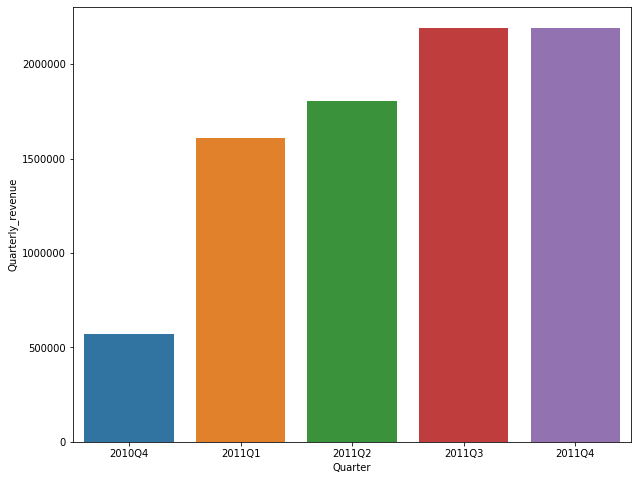

In [106]:
plt.figure(figsize=(10,8))
sns.barplot(Quarterly_revenue['Quarter'],Quarterly_revenue['Quarterly_revenue'])
plt.show()

- 2011Q3 (3 months) and 2011Q4 (2 months) - since we dropped DEC records
- Eventhough the revenue is almost same
- This is due to high number of orders in November 2011

### Monthly Revenue

In [107]:
monthly_revenue = cleaned_data.groupby('Year_Month')['Total_Sales_Amount'].sum()
monthly_revenue = pd.DataFrame(monthly_revenue)
monthly_revenue = monthly_revenue.reset_index()
monthly_revenue = monthly_revenue.rename({'Total_Sales_Amount':'monthly_revenue'},axis=1)
monthly_revenue

,Year_Month,monthly_revenue
0,201012,570422.730
1,201101,568101.310
2,201102,446084.920
3,201103,594081.760
4,201104,468374.331
5,201105,677355.150
6,201106,660046.050
7,201107,598962.901
8,201108,644051.040
9,201109,950690.202


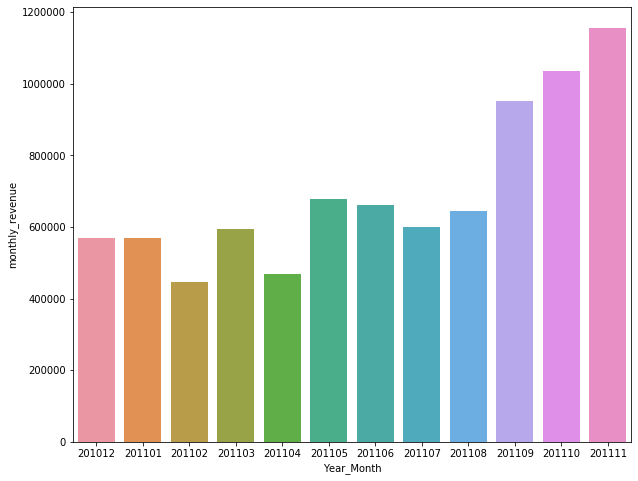

In [108]:
plt.figure(figsize=(10,8))
sns.barplot(monthly_revenue['Year_Month'],monthly_revenue['monthly_revenue'])
plt.show()

### Daily Order Count

In [109]:
daily_order_count = cleaned_data.groupby('Day')['InvoiceNo'].nunique()
daily_order_count = pd.DataFrame(daily_order_count)
daily_order_count = daily_order_count.reset_index()
daily_order_count = daily_order_count.rename({'InvoiceNo':'Daily_Order_Count'},axis=1)
daily_order_count

,Day,Daily_Order_Count
0,1,2747
1,2,3075
2,3,3351
3,4,3802
4,5,2676
5,7,2107


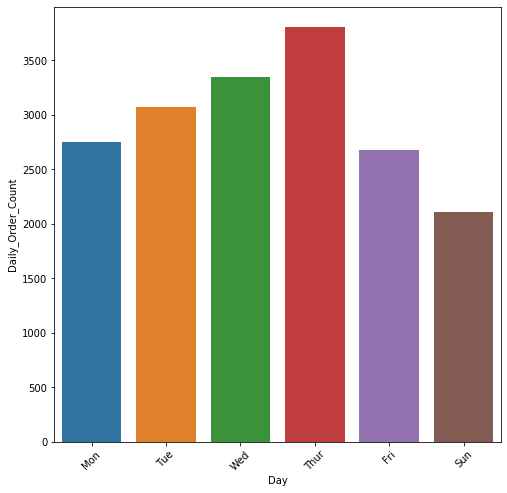

In [110]:
plt.figure(figsize=(8,8))
ax = sns.barplot(daily_order_count['Day'],daily_order_count['Daily_Order_Count'])
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation=45)
plt.show()

#### There are no orders placed on Saturdays

### Hourly Order Count

In [111]:
hourly_order_count = cleaned_data.groupby('Hour')['InvoiceNo'].nunique()
hourly_order_count = pd.DataFrame(hourly_order_count)
hourly_order_count = hourly_order_count.reset_index()
hourly_order_count = hourly_order_count.rename({'InvoiceNo':'Hourly_Order_Count'},axis=1)
hourly_order_count

,Hour,Hourly_Order_Count
0,6,1
1,7,29
2,8,528
3,9,1343
4,10,2150
5,11,2185
6,12,2979
7,13,2531
8,14,2194
9,15,1956


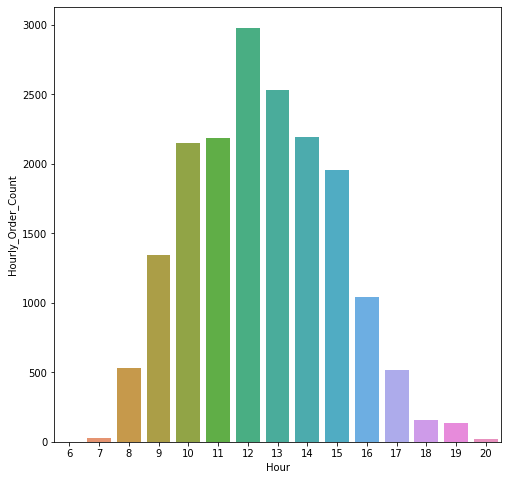

In [112]:
plt.figure(figsize=(8,8))
sns.barplot(hourly_order_count['Hour'],hourly_order_count['Hourly_Order_Count'])
plt.show()

#### Maximum no. of orders are placed around 12PM
#### No orders are placed from 9PM to 6AM

### Day of Month Order Count

In [113]:
cleaned_data.insert(loc=6,column='Day_of_Month',value=cleaned_data.InvoiceDate.dt.day)

In [114]:
cleaned_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Day_of_Month,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Months_by_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,1,201012,2010,12,3,8,2.55,17850,United Kingdom,15.30,2010Q4,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,1,201012,2010,12,3,8,3.39,17850,United Kingdom,20.34,2010Q4,Dec


In [115]:
date_order_count = cleaned_data.groupby('Day_of_Month')['InvoiceNo'].nunique()
date_order_count = pd.DataFrame(date_order_count)
date_order_count = date_order_count.reset_index()
date_order_count = date_order_count.rename({'InvoiceNo':'Day_of_Month_Order_Count'},axis=1)
date_order_count

,Day_of_Month,Day_of_Month_Order_Count
0,1,591
1,2,499
2,3,520
3,4,567
4,5,607
5,6,691
6,7,669
7,8,658
8,9,619
9,10,627


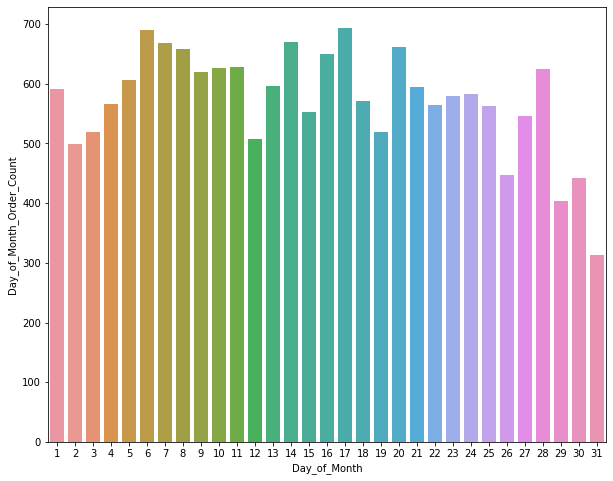

In [116]:
plt.figure(figsize=(10,8))
sns.barplot(date_order_count['Day_of_Month'],date_order_count['Day_of_Month_Order_Count'])
plt.show()

### Multivariate Analysis

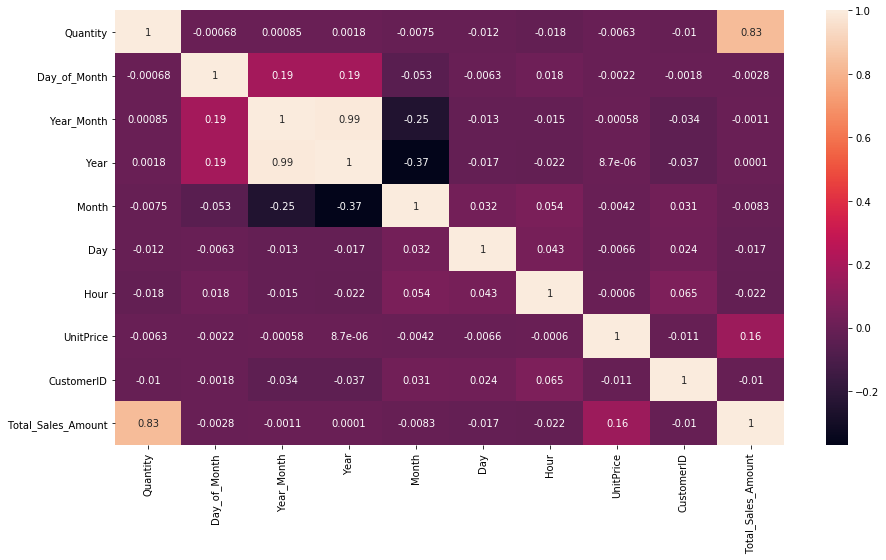

In [117]:
plt.figure(figsize=(15,8)) 
sns.heatmap(cleaned_data.corr(),annot=True)
plt.show()

- Year_Month and Year (0.99)
- Quantity and Total_Sales_Amount (0.83)
- **Need to do Scaling after we do RFM analysis to further analyse the correlation**

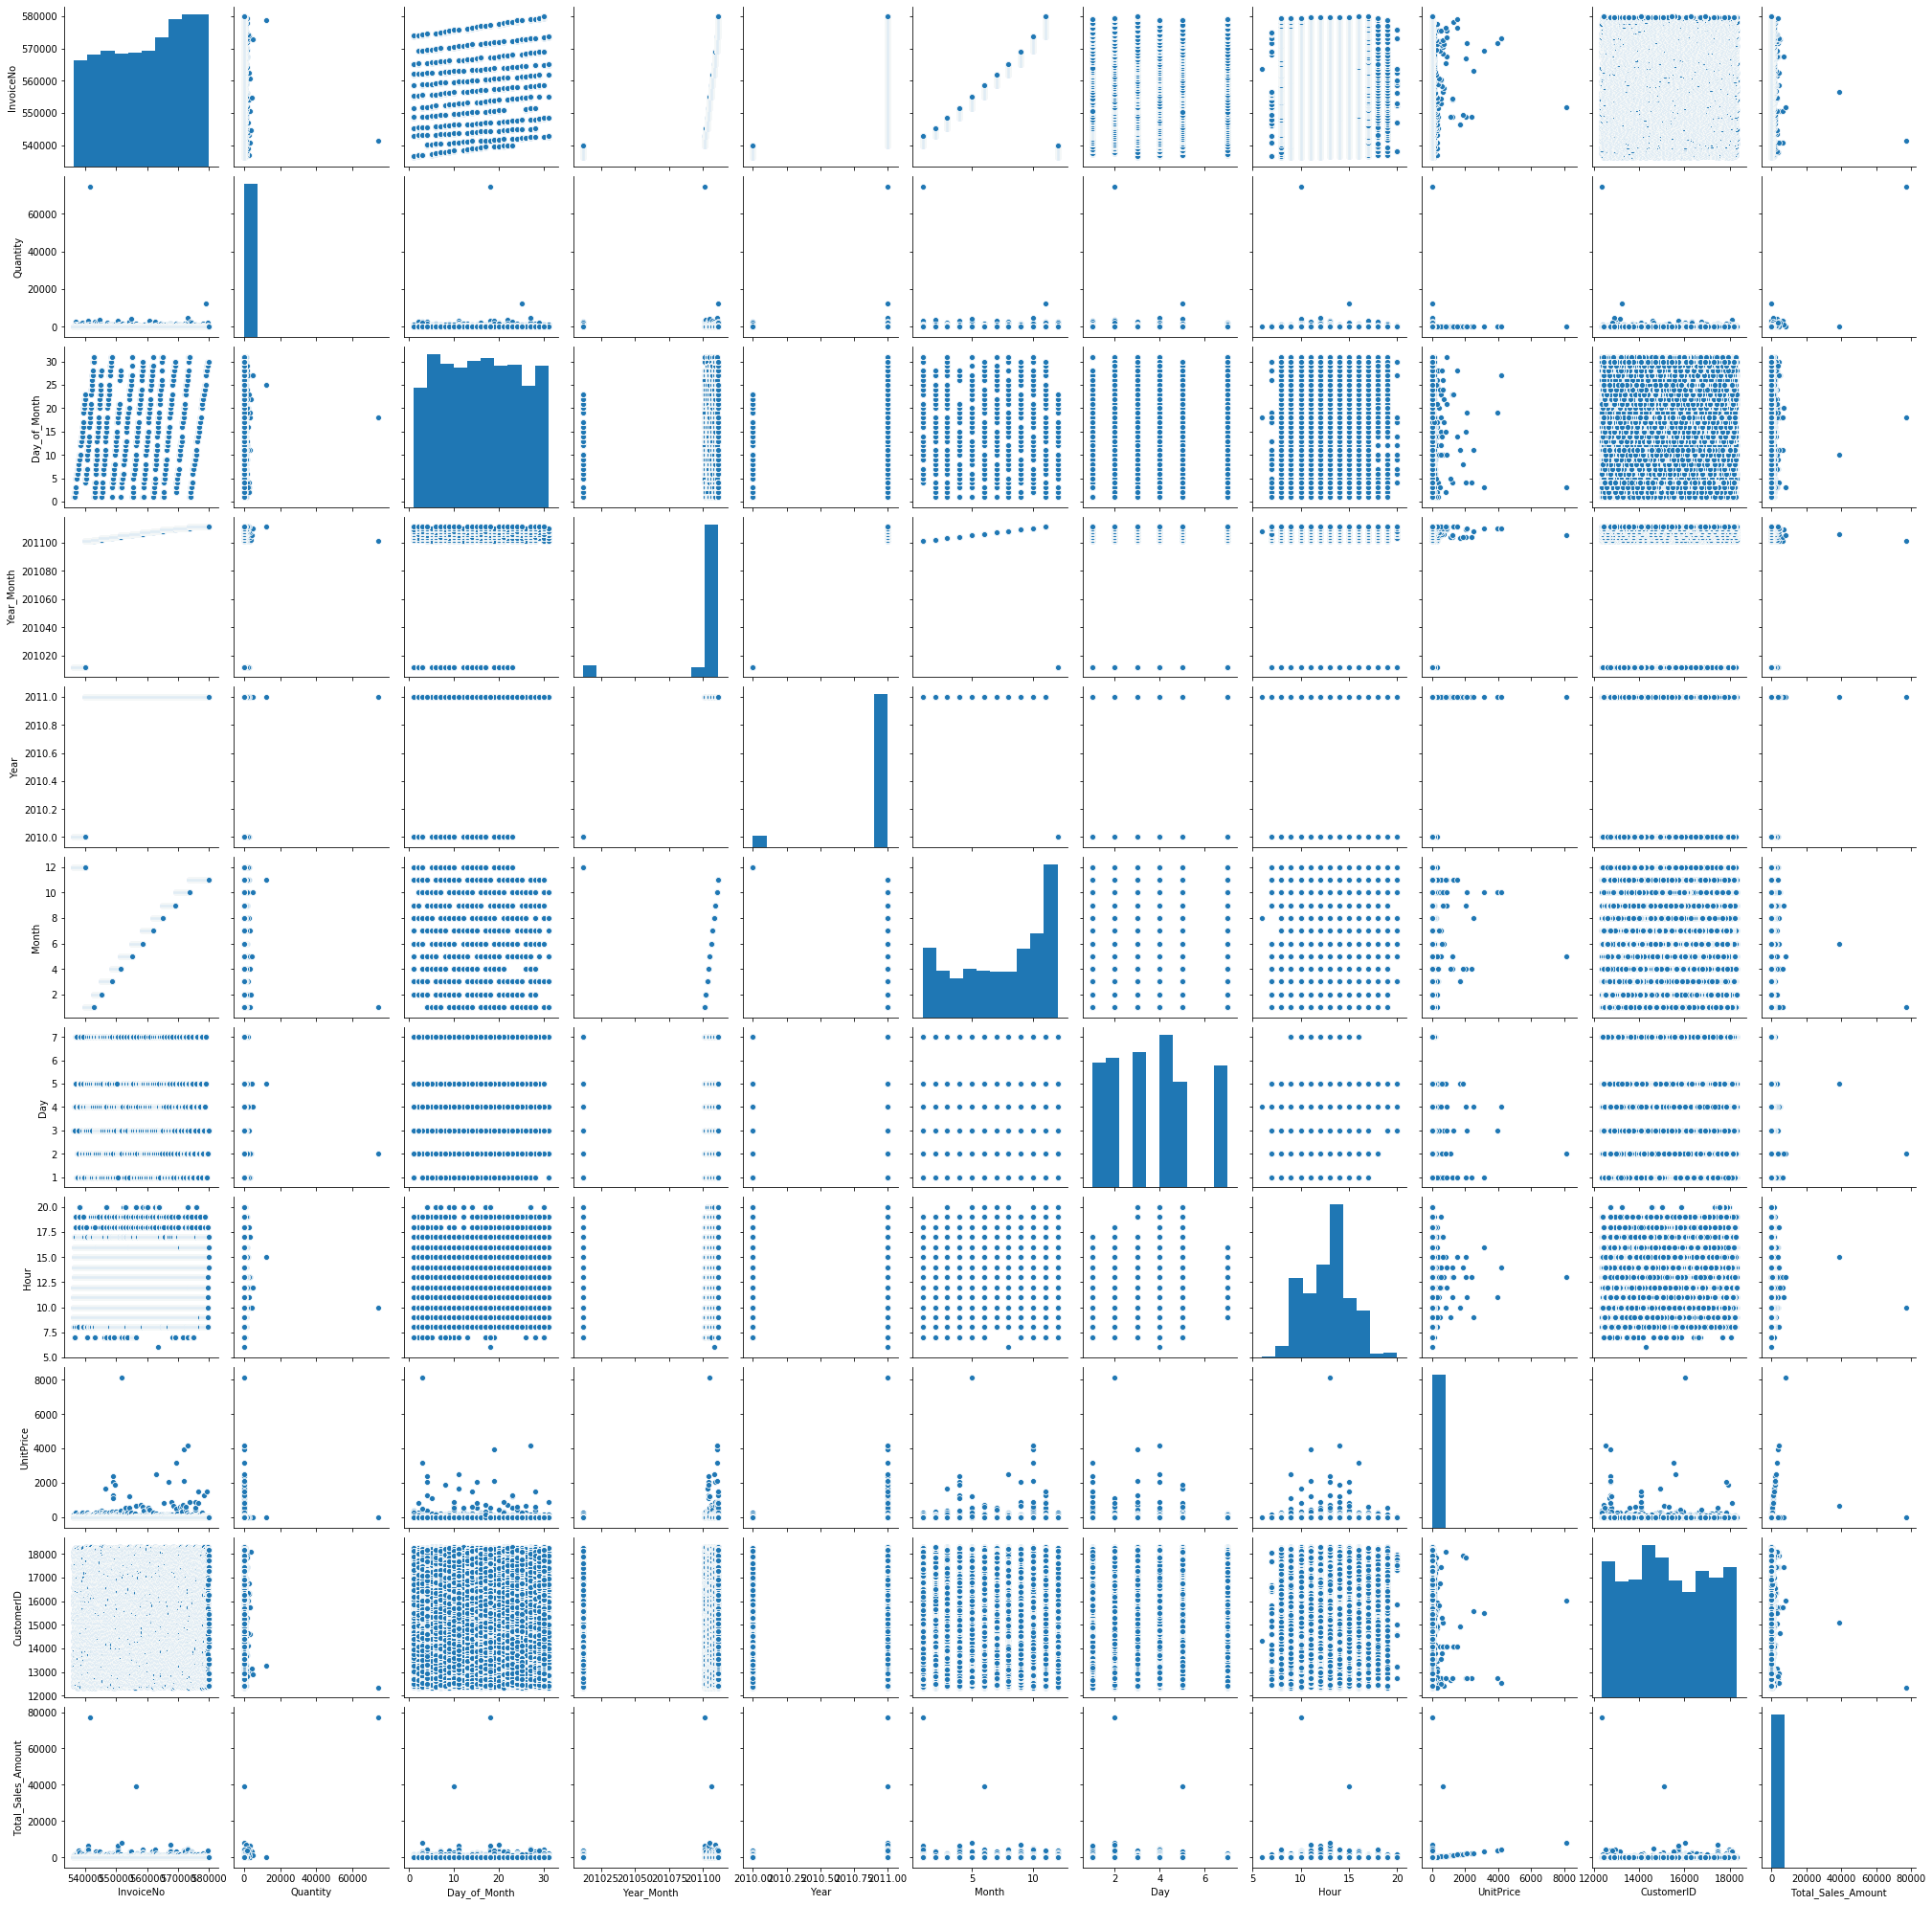

In [118]:
sns.pairplot(cleaned_data)
plt.show()

### Creating a separate Excel file for Cleaned Data

In [119]:
# cleaned_data.to_csv('Cleaned_Online_Retail.xlxs')